In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from datetime import datetime
import re
import joblib
import json
import math
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [2]:
"""
train_df = pd.read_csv("post_data/train_Ft.csv")
self_test_df = pd.read_csv("post_data/self_test_Ft.csv")
train_hour_df = pd.read_csv("post_data/train_hour_data.csv")
self_test_hour_df = pd.read_csv("post_data/test_hour_data.csv")

train_df.drop(["hour"], axis=1, inplace=True)
self_test_df.drop(["hour"], axis=1, inplace=True)
train_df = pd.concat([train_df, train_hour_df], axis=1)
self_test_df = pd.concat([self_test_df, self_test_hour_df], axis=1)

del train_hour_df
del self_test_hour_df
train_df = train_df.iloc[:,1:]
self_test_df = self_test_df.iloc[:,1:]

train_df.to_csv("post_data/final_train_Ft.csv", index=False)
self_test_df.to_csv("post_data/final_self_test_Ft.csv", index=False)
"""
train_df = pd.read_csv("post_data/final_train_Ft.csv")
self_test_df = pd.read_csv("post_data/final_self_test_Ft.csv")
train_df.info()
self_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 84 columns):
 #   Column                Dtype
---  ------                -----
 0   click                 int64
 1   C1_1001               int64
 2   C1_1002               int64
 3   C1_1005               int64
 4   C1_1007               int64
 5   C1_1008               int64
 6   C1_1010               int64
 7   C1_1012               int64
 8   banner_pos_0          int64
 9   banner_pos_1          int64
 10  banner_pos_2          int64
 11  banner_pos_3          int64
 12  banner_pos_4          int64
 13  banner_pos_5          int64
 14  banner_pos_7          int64
 15  device_type_0         int64
 16  device_type_1         int64
 17  device_type_2         int64
 18  device_type_4         int64
 19  device_type_5         int64
 20  device_conn_type_0    int64
 21  device_conn_type_2    int64
 22  device_conn_type_3    int64
 23  device_conn_type_5    int64
 24  C15_120               in

In [20]:
# To balance the click/non-click ratio
"""
train_df_c = train_df[ train_df['click']==1 ] 
train_df_nc = train_df[ train_df['click']==0 ].sample(n=len(train_df_c), axis=0)
blc_train_df = pd.concat([train_df_c, train_df_nc], axis=0)
from sklearn.utils import shuffle
blc_train_df = shuffle(blc_train_df)
"""

In [6]:
def GridSearchingBDT( X, y, _scoring="accuracy" ):
    from sklearn.tree import DecisionTreeClassifier as DTC
    from sklearn.ensemble import AdaBoostClassifier as AdaB
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV as GS

    #param = { "base_estimator__max_depth" : range(3,20), "n_estimators": [30, 40, 50, 60, 70], "learning_rate":[0.1,0.05] } # for accuracy 
    param = { "base_estimator__max_depth" : range(10,30), "n_estimators": [30, 40, 50, 60, 70], "learning_rate":[0.1,0.05] } #for f1
    tree = DTC( random_state=1 )
    ABC = AdaB( base_estimator=tree, random_state=11 )
    grid_search_ABC = GS(ABC, param_grid=param, scoring = _scoring, verbose=10, cv=3, n_jobs=-1)
    grid_search_ABC.fit(X, y)
    print(grid_search_ABC.best_score_, grid_search_ABC.best_estimator_, grid_search_ABC.best_params_)
    # Store the best model
    final_model = grid_search_ABC.best_estimator_
    model_name = "Model/GS_BDT_training_best" + _scoring
    joblib.dump( final_model, model_name )

    return final_model

In [14]:
GridSearchingBDT(train_df.iloc[:50000,1:], train_df.iloc[:50000,0])

(50000, 83)
(50000,)
Fitting 3 folds for each of 170 candidates, totalling 510 fits
0.8287599866627412 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=30, random_state=11) {'base_estimator__max_depth': 4, 'learning_rate': 0.1, 'n_estimators': 30}


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=30, random_state=11)

In [28]:
GridSearchingBDT(train_df.iloc[:5000,1:], train_df.iloc[:5000,0])

(5000, 83)
(5000,)
Fitting 3 folds for each of 170 candidates, totalling 510 fits
0.8213995856290927 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=30, random_state=11) {'base_estimator__max_depth': 3, 'learning_rate': 0.05, 'n_estimators': 30}


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=30, random_state=11)

In [27]:
GridSearchingBDT(blc_train_df.iloc[:50000,1:], blc_train_df.iloc[:50000,0])

(50000, 83)
(50000,)
Fitting 3 folds for each of 170 candidates, totalling 510 fits
0.6752399861399149 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         random_state=1),
                   learning_rate=0.1, random_state=11) {'base_estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 50}


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         random_state=1),
                   learning_rate=0.1, random_state=11)

In [25]:
GridSearchingBDT(blc_train_df.iloc[:5000,1:], blc_train_df.iloc[:5000,0])

(5000, 83)
(5000,)
Fitting 3 folds for each of 170 candidates, totalling 510 fits
0.663997092538275 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, random_state=11) {'base_estimator__max_depth': 3, 'learning_rate': 0.05, 'n_estimators': 50}


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, random_state=11)

In [7]:
GridSearchingBDT(train_df.iloc[:5000,1:], train_df.iloc[:5000,0], "f1")

Fitting 3 folds for each of 200 candidates, totalling 600 fits
0.2640907274907513 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=26,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=30, random_state=11) {'base_estimator__max_depth': 26, 'learning_rate': 0.05, 'n_estimators': 30}


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=26,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=30, random_state=11)

In [20]:
def Training_BDT(X, y, name=""):
    from sklearn.tree import DecisionTreeClassifier as DTC
    from sklearn.ensemble import AdaBoostClassifier as AdaB
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV as GS

    tree = DTC( random_state=1, max_depth=4 )
    ABC = AdaB( base_estimator=tree, random_state=11, n_estimators=30, learning_rate=0.1 )
    ABC.fit(X, y)
    # Store the best model
    final_model = ABC
    model_name = "Model/final_BDT_training" + name
    joblib.dump( final_model, model_name )

    return final_model

In [31]:
#Training_BDT(train_df.iloc[:500000,1:], train_df.iloc[:500000,0], "_500k_Nblc")
#Training_BDT(train_df.iloc[:1000000,1:], train_df.iloc[:1000000,0], "_1m_Nblc")

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=30, random_state=11)

In [32]:
# to check the accuracy with self_testing sample
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
model__bdt_500k = joblib.load( "Model/final_BDT_training_500k_Nblc" )
print("score_500k : ", accuracy_score(self_test_df.iloc[:,0], model_bdt_500k.predict(self_test_df.iloc[:,1:])))

model_bdt_1m = joblib.load( "Model/final_BDT_training_1m_Nblc" )
print("score_1m : ", accuracy_score(self_test_df.iloc[:,0], model_bdt_1m.predict(self_test_df.iloc[:,1:])))

score_500k :  0.830777
score_1m :  0.830905


In [34]:
### Do the grid search on the Random Forest 
def GridSearchingRF( X, y, _scoring="accuracy" ):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV as GS

    param = { "n_estimators" : [50,100,150,200,250,300] } 
    forest = RandomForestClassifier( criterion='gini', random_state=22, n_jobs=-1)
    grid_search = GS(forest, param_grid=param, scoring = _scoring, verbose=10, cv=3, n_jobs=-1)
    grid_search.fit(X, y)
    print(grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_)
    # Store the best model
    final_model = grid_search.best_estimator_
    model_name = "Model/GS_RF_training_best" + _scoring
    joblib.dump( final_model, model_name )

    return final_model

In [39]:
GridSearchingRF(train_df.iloc[:15000,1:], train_df.iloc[:15000,0])

(15000, 83)
(15000,)
Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\users\snail\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.796      0.7982            nan        nan        nan 0.79973333]
  category=UserWarning


0.7997333333333333 RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=22) {'n_estimators': 300}


RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=22)

In [19]:
def Training_RF(X, y, name=""):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV as GS

    forest = RandomForestClassifier( n_estimators=300, criterion='gini', random_state=22, n_jobs=-1)
    forest.fit(X, y)
    # Store the best model
    final_model = forest
    model_name = "Model/final_RF_training" + name
    joblib.dump( final_model, model_name )

    return final_model

In [32]:
Training_RF(train_df.iloc[:1000000,1:], train_df.iloc[:1000000,0], "_1m_Nblc")

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=22)

In [8]:
model_rf_1m = joblib.load( "Model/final_RF_training_1m_Nblc" )
print("score_1m : ", accuracy_score(self_test_df.iloc[:,0],  model_rf_1m.predict(self_test_df.iloc[:,1:])))

score_1m :  0.827055


In [12]:
### Do the grid search on the Random Forest 
def GridSearchingLR( X, y, _scoring="accuracy" ):
    from sklearn import preprocessing
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV as GS
    from sklearn.pipeline import make_pipeline
    from sklearn.linear_model import LogisticRegression

    grid_search = GS(LogisticRegression(), param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 10., 100.]}, cv=2, refit=True, scoring = _scoring, verbose=10, n_jobs=-1)
    pipeline = make_pipeline(StandardScaler(), grid_search)
    
    pipeline.fit(X, y)
    print(grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_)
    # Store the best model
    final_model = grid_search.best_estimator_
    model_name = "Model/GS_LR_training_best" + _scoring
    joblib.dump( final_model, model_name )

    return final_model

In [29]:
GridSearchingLR(train_df.iloc[:100000,1:], train_df.iloc[:100000,0])

Fitting 2 folds for each of 6 candidates, totalling 12 fits
0.8289200000000001 LogisticRegression(C=0.001) {'C': 0.001}


LogisticRegression(C=0.001)

In [14]:
def Training_LR(X, y, name=""):
    from sklearn import preprocessing
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import make_pipeline
    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression(C=0.001)
    pipeline = make_pipeline(StandardScaler(), lr)
    pipeline.fit(X, y)
    # Store the best model
    final_model = pipeline
    model_name = "Model/final_LR_training" + name
    joblib.dump( final_model, model_name )

    return final_model

In [31]:
Training_LR(train_df.iloc[:2000000,1:], train_df.iloc[:2000000,0], "_1m_Nblc")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.001))])

In [33]:
model_lr_2m = joblib.load( "Model/final_LR_training_2m_Nblc" )
print("score_2m : ", accuracy_score(self_test_df.iloc[:,0],  model_lr_2m.predict(self_test_df.iloc[:,1:])))

score_2m :  0.829769


In [35]:
def Training_EnsembleModel(X, y, name=""):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import VotingClassifier
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.pipeline import make_pipeline
    
    lr = LogisticRegression(C=0.001)
    pipeline = make_pipeline(StandardScaler(), lr)
    
    forest = RandomForestClassifier( n_estimators=300, criterion='gini', random_state=22, n_jobs=-1)
    
    tree = DecisionTreeClassifier( random_state=1, max_depth=4 )
    ABC = AdaBoostClassifier( base_estimator=tree, random_state=11, n_estimators=30, learning_rate=0.1 )
    
    model = VotingClassifier(estimators=[
            ('lr', pipeline), ('rf', forest), ('bdt', ABC)],
            voting='soft')
    model = model.fit(X, y)
    joblib.dump( model, "final_Ensemble_training"+name )
    print("Accuracy : ", accuracy_score(self_test_df.iloc[:,0],  model.predict(self_test_df.iloc[:,1:])))
    
Training_EnsembleModel(train_df.iloc[:1000000,1:], train_df.iloc[:1000000,0], "_1m_esm")

Accuracy :  0.83067


In [7]:
"""
from sklearn.ensemble import VotingClassifier
import joblib
model_lr_2m = joblib.load( "Model/final_LR_training_2m_Nblc" )
model_rf_1m = joblib.load( "Model/final_RF_training_1m_Nblc" )
model_bdt_1m = joblib.load( "Model/final_BDT_training_1m_Nblc" )
model_esm2 = VotingClassifier(estimators=[
            ('lr', model_lr_2m), ('rf', model_rf_1m), ('bdt', model_bdt_1m)],
            voting='soft')
print("Accuracy : ", accuracy_score(self_test_df.iloc[:,0],  model_esm2.predict(self_test_df.iloc[:,1:])))
"""

'\nfrom sklearn.ensemble import VotingClassifier\nimport joblib\nmodel_lr_2m = joblib.load( "Model/final_LR_training_2m_Nblc" )\nmodel_rf_1m = joblib.load( "Model/final_RF_training_1m_Nblc" )\nmodel_bdt_1m = joblib.load( "Model/final_BDT_training_1m_Nblc" )\nmodel_esm2 = VotingClassifier(estimators=[\n            (\'lr\', model_lr_2m), (\'rf\', model_rf_1m), (\'bdt\', model_bdt_1m)],\n            voting=\'soft\')\nprint("Accuracy : ", accuracy_score(self_test_df.iloc[:,0],  model_esm2.predict(self_test_df.iloc[:,1:])))\n'

[[822094   7946]
 [161384   8576]]


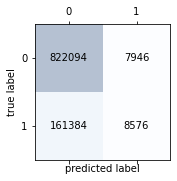

Precision: 0.519
Recall: 0.050
F1: 0.092


In [10]:
import matplotlib.pyplot as plt
def test(X, y, model_name="Model/final_Ensemble_training_1m_esm"):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score, f1_score
    
    model = joblib.load( model_name )
    y_pred = model.predict(X)
    confmat = confusion_matrix(y_true=y, y_pred=y_pred)
    print(confmat)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()
    
    print('Precision: %.3f' % precision_score(y_true=y, y_pred=y_pred))
    print('Recall: %.3f' % recall_score(y_true=y, y_pred=y_pred))
    print('F1: %.3f' % f1_score(y_true=y, y_pred=y_pred))
    
test(self_test_df.iloc[:,1:], self_test_df.iloc[:,0])

In [17]:
train_df_c = train_df[ train_df['click']==1 ] 
train_df_nc = train_df[ train_df['click']==0 ].sample(n=len(train_df_c), axis=0)
blc_train_df = pd.concat([train_df_c, train_df_nc], axis=0)
from sklearn.utils import shuffle
blc_train_df = shuffle(blc_train_df)

[[514202 315838]
 [ 48841 121119]]


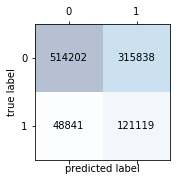

Precision: 0.277
Recall: 0.713
F1: 0.399


In [18]:
Training_LR(blc_train_df.iloc[:1000000,1:], blc_train_df.iloc[:1000000,0], "_1m_blc")
test(self_test_df.iloc[:,1:], self_test_df.iloc[:,0], "Model/final_LR_training_1m_blc")

In [24]:
print(train_df_c.head(10))
print(train_df_nc.head(10))
print(len(train_df_c))

    click  C1_1001  C1_1002  C1_1005  C1_1007  C1_1008  C1_1010  C1_1012  \
0       1        0        0        1        0        0        0        0   
1       1        0        0        1        0        0        0        0   
6       1        0        0        1        0        0        0        0   
9       1        0        0        1        0        0        0        0   
13      1        0        0        1        0        0        0        0   
16      1        0        0        1        0        0        0        0   
32      1        0        0        1        0        0        0        0   
34      1        0        0        1        0        0        0        0   
35      1        0        1        0        0        0        0        0   
43      1        0        0        0        0        0        1        0   

    banner_pos_0  banner_pos_1  ...  weekday_5.0  weekday_6.0  dayhour_1-4  \
0              1             0  ...            0            0            1   
1      